# **Taller Clasificación en Python con scikit learn**

# Entrenamiento y prueba de un clasificador Naive Bayes

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


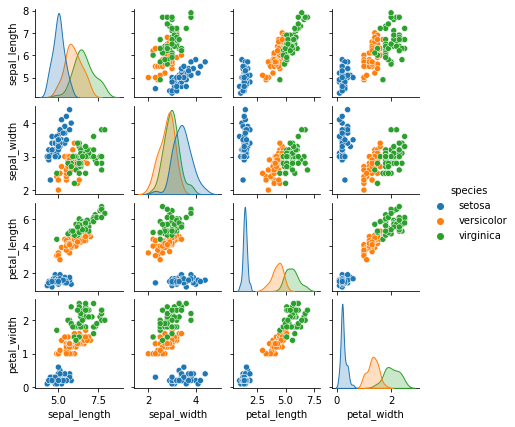

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
print(iris.head())
sns.pairplot(iris, hue = 'species', height = 1.5)

In [2]:
X_iris = iris.drop('species', axis=1)
print(X_iris.shape)
y_iris = iris['species']
print(y_iris.shape)

(150, 4)
(150,)


In [3]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(
  X_iris, y_iris, random_state=1) 
print(Xtrain.shape)
print(Xtest.shape)


(112, 4)
(38, 4)


In [4]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [5]:
from sklearn.metrics import accuracy_score
import numpy
import sys
numpy.set_printoptions(threshold=sys.maxsize)

acc_score = accuracy_score(ytest, y_model)
print("Precisión: ", acc_score)
print("Test")
print(ytest.values)
print("Modelo")
print(y_model)

Precisión:  0.9736842105263158
Test
['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'virginica' 'setosa'
 'versicolor' 'setosa']
Modelo
['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'virginica' 'setosa'
 'versicolor' 'setosa']


# Ejemplo de reconocimiento de dígitos

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.images.shape)

(1797, 8, 8)


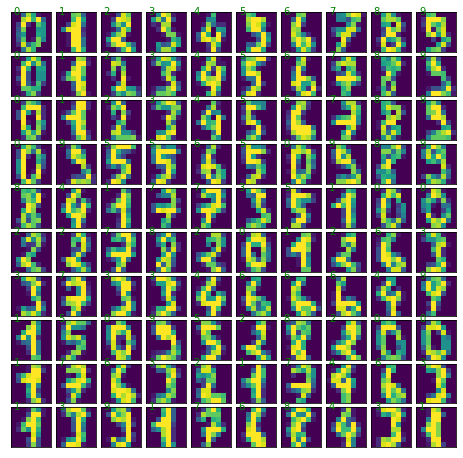

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(
      10, 10, figsize=(8, 8),
      subplot_kw={'xticks':[], 'yticks':[]},
      gridspec_kw=dict(hspace=0.1, wspace=0.1)
  )

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i]) 
    ax.text(0.05, 0.05, str(digits.target[i]),color='green')

In [8]:
X = digits.data 
print("Tamaño X: ", X.shape)
y = digits.target
print("Tamaño y: ", y.shape)


Tamaño X:  (1797, 64)
Tamaño y:  (1797,)


In [9]:
import pandas as pd
X_dig = pd.DataFrame(X)
y_dig = pd.Series(y)  

In [10]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(
  X_dig, y_dig, random_state=1) 
print(Xtrain.shape)
print(Xtest.shape)

(1347, 64)
(450, 64)


In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
ymodel = model.predict(Xtest)

In [12]:
from sklearn.metrics import accuracy_score
import numpy
import sys
numpy.set_printoptions(threshold=sys.maxsize)

acc_score = accuracy_score(ytest, ymodel)
print("Precisión: ", acc_score)
print("Test")
print(ytest.values)
print("Modelo")
print(ymodel)

Precisión:  0.8533333333333334
Test
[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 9 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 8 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 0 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 3 7 1 9 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 0 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 8 5 0 0 4 9 3 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 9 3 9 8 7 0 2 3 5 9 2 8 1 9 3 3 0 0 7 3 8
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 3 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 3]
Modelo
[1 5 0 7 1 0 6 1 5 4 9 8 7 8 4 6 4 3 7 4 7 

In [13]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(ytest, ymodel)

Text(91.68, 0.5, 'valor real')

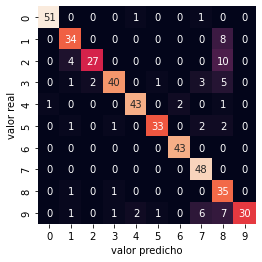

In [14]:
import seaborn as sns
plt.clf()
sns.heatmap(con_mat, square=True, \
  annot=True, cbar=False) 
plt.xlabel('valor predicho')
plt.ylabel('valor real')

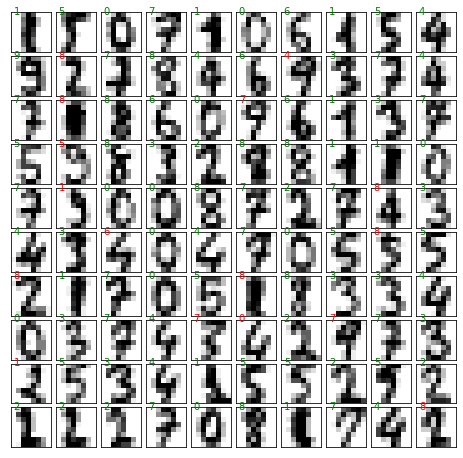

In [15]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8), 
                         subplot_kw={'xticks':[], 
                                     'yticks':[]}, 
                         gridspec_kw=dict(hspace=0.1, wspace=0.1) 
                         )

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[ytest.index[i]],  
              cmap='binary', 
              interpolation='nearest') 
    ax.text(0.05, 0.05, str(ymodel[i]), 
            color='green' if (ytest.values[i] == ymodel[i]) else 'red'
            )

# Support vector machines

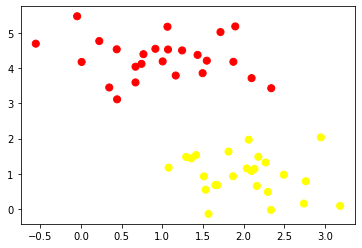

In [16]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')


In [17]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)


SVC(C=10000000000.0, kernel='linear')

Vectores de soporte:
 [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


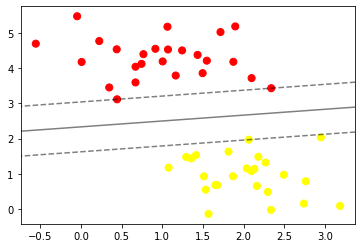

In [18]:
import numpy as np

print( "Vectores de soporte:\n", model.support_vectors_)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xlp = np.linspace(xlim[0], xlim[1], 30)
ylp = np.linspace(ylim[0], ylim[1], 30)
Xm, Ym = np.meshgrid(xlp, ylp)
xy = np.vstack([Xm.ravel(), Ym.ravel()]).T
P = model.decision_function(xy).reshape(Xm.shape)

ax.contour(Xm, Ym, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

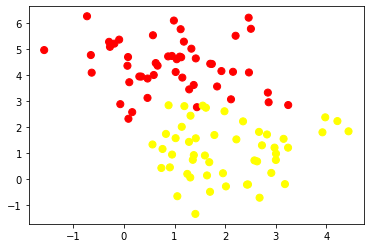

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, \
  random_state=0, cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, \
  cmap='autumn');

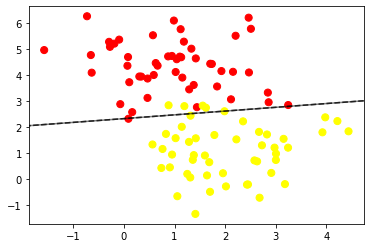

In [20]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)


fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xlp = np.linspace(xlim[0], xlim[1], 30)
ylp = np.linspace(ylim[0], ylim[1], 30)
Xm, Ym = np.meshgrid(xlp, ylp)
xy = np.vstack([Xm.ravel(), Ym.ravel()]).T
P = model.decision_function(xy).reshape(Xm.shape)

ax.contour(Xm, Ym, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


**Cambie C por 1000, 10 y 0.1**

# Kernel SVM

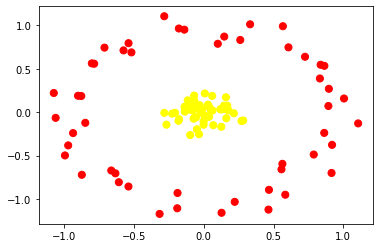

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, \
  cmap='autumn')


Text(0.5, 0, 'z')

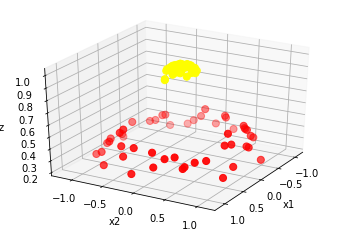

In [22]:
z = np.exp(-(X ** 2).sum(1))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], z, c=y, s=50, \
  cmap='autumn')
ax.view_init(elev=30, azim=30)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')


In [23]:
from sklearn.svm import SVC 
model_kernel = SVC(kernel='rbf', C=1E6)
model_kernel.fit(X, y)


SVC(C=1000000.0)

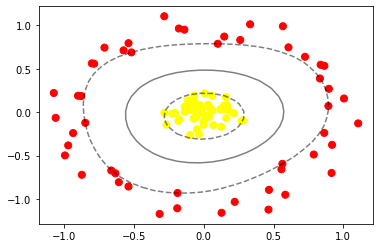

In [24]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xlp = np.linspace(xlim[0], xlim[1], 30)
ylp = np.linspace(ylim[0], ylim[1], 30)
Xm, Ym = np.meshgrid(xlp, ylp)
xy = np.vstack([Xm.ravel(), Ym.ravel()]).T
P = model_kernel.decision_function(xy).reshape(Xm.shape)

ax.contour(Xm, Ym, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Ejemplo reconocimiento facial

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


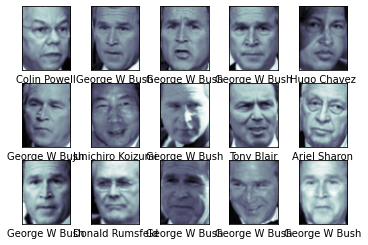

In [26]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], 
      xlabel=faces.target_names[faces.target[i]])


In [27]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(svd_solver='randomized', n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)


In [28]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [29]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'svc__C': [1, 5, 10, 50], 
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
grid.fit(Xtrain, ytrain)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            svd_solver='randomized',
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]})

In [30]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

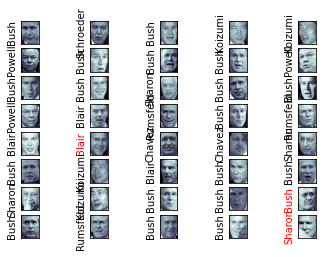

In [31]:
fig, ax = plt.subplots(8, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel( 
        faces.target_names[yfit[i]].split()[-1], 
        color='black' if yfit[i] == ytest[i] 
        else 'red')

Text(91.68, 0.5, 'etiqueta predicha')

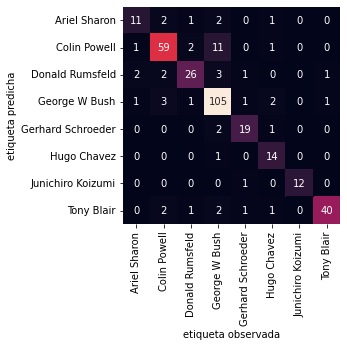

In [32]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('etiqueta observada')
plt.ylabel('etiqueta predicha')
